# Exercise solutions

In [ ]:
# Initialising
import numpy as np
from scipy.stats import norm, chi2, geom, chisquare, kstest, expon, pareto, t
import heapq
import matplotlib.pyplot as plt
from math import factorial, sqrt, log, exp, pi
import random
import math
np.random.seed(237)

## Exercise 1

A) Write a program implementing a linear congruential generator (LCG). Be sure that the program works correctly using only integer representation.

**Linear Congruential Generator (LCG)**

An LCG has the form:

$$
X_{n+1} = (a \cdot X_n + c) \mod m
$$

Where:

- \( a \): multiplier  
- \( c \): shift 
- \( m \): modulus  
- \( X_0 \): initial value (seed)


In [390]:
# LCG implementation
def lcg(n, a, c, m, seed=seed):
    x = seed
    numbers = []
    for _ in range(n):
        x = (a * x + c) % m
        numbers.append(x / m)  # Normaliser til [0,1)
    return numbers


# Histogram of generated numbers
def histogram_data(numbers, num_bins, min_val, max_val):
    bin_width = (max_val - min_val) / num_bins
    hist_counts = [0] * num_bins
    
    for val in numbers:
        bin_index = int((val - min_val) / bin_width)
        if bin_index >= num_bins:  # Clamp to last bin if val == 1.0 (rare but safe)
            bin_index = num_bins - 1
        hist_counts[bin_index] += 1
    
    return hist_counts

def histogram_plot(num_bins, min_val, max_val, hist_counts):
    bin_width = (max_val - min_val) / num_bins
    histogram_text = ""
    
    for i in range(num_bins):
        start = min_val + i * bin_width
        end = start + bin_width
        bar = '█' * int((hist_counts[i] / max(hist_counts)) * 40)
        label = f"[{start:.1f}, {end:.1f})"
        histogram_text += f"{label.ljust(14)} | {bar} ({hist_counts[i]})\n"
    
    return histogram_text



In [391]:
#Parameters

# Constants for LCG
a = 5
c = 1
m = 16
n = 10000

# Parameters for [0,1) interval
num_bins = 10
min_val = 0.0
max_val = 1.0
bin_width = (max_val - min_val) / num_bins

# Initialize bins
hist_counts = [0] * num_bins


In [392]:
#Running the LCG and generate numbers
# Generating 10000 random numbers
numbers = lcg(n, a, c, m, seed)

# Generating histogram data
hist_counts = histogram_data(numbers, num_bins, min_val, max_val)

# Generating histogram plot
histogram_text = histogram_plot(num_bins, min_val, max_val, hist_counts)

# Printer histogram
print("Histogram of LCG-generated numbers:")
print(histogram_text)

Histogram of LCG-generated numbers:
[0.0, 0.1)     | ████████████████████████████████████████ (1250)
[0.1, 0.2)     | ████████████████████████████████████████ (1250)
[0.2, 0.3)     | ████████████████████ (625)
[0.3, 0.4)     | ████████████████████████████████████████ (1250)
[0.4, 0.5)     | ████████████████████ (625)
[0.5, 0.6)     | ████████████████████████████████████████ (1250)
[0.6, 0.7)     | ████████████████████████████████████████ (1250)
[0.7, 0.8)     | ████████████████████ (625)
[0.8, 0.9)     | ████████████████████████████████████████ (1250)
[0.9, 1.0)     | ████████████████████ (625)



#### B

Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests- χ2,Kolmogorov-Smirnov, run-tests preferably but not necessarily all 3, and correlation test forsome h-values.

In [393]:
# Show 20 x_i
def show_numbers(numbers):
    print("First 20 generated numbers:")
    print(" i     X_i     ")
    print("--------------")
    for i in range(20):
        xi = round(numbers[i], 4)
        print(f"{i:<5} {xi:<10} ")

show_numbers(numbers)


First 20 generated numbers:
 i     X_i     
--------------
0     0.125      
1     0.6875     
2     0.5        
3     0.5625     
4     0.875      
5     0.4375     
6     0.25       
7     0.3125     
8     0.625      
9     0.1875     
10    0.0        
11    0.0625     
12    0.375      
13    0.9375     
14    0.75       
15    0.8125     
16    0.125      
17    0.6875     
18    0.5        
19    0.5625     


#### Chi_squared test

In [394]:
def chi_squared_test(hist_counts, num_bins):
    """
    Performing a chi-squared test on the histogram counts.
    """
    expected = len(numbers) // num_bins
    chi_squared = 0
    df = num_bins - 1  # degrees of freedom
    for observed in hist_counts:
        chi_squared += ((observed - expected) ** 2) / expected
        
    return chi_squared, df

chi_squared, df = chi_squared_test(hist_counts, num_bins)

print(f"\nChi-squared statistic: {chi_squared:.2f}")
print(f"Degrees of freedom: {df}")



Chi-squared statistic: 937.50
Degrees of freedom: 9


#### Correlation test

In [395]:
def lag_correlation(U, h=1):
    n = len(U)
    return sum(U[i] * U[i + h] for i in range(n - h)) / (n - h)

ch = lag_correlation(numbers, h=1)
print(f"Estimated c₁ = {ch:.5f}")


Estimated c₁ = 0.24220


#### Kolmogorov Smirnov test

In [396]:
def ks_test_uniform(data):
    n = len(data)
    sorted_data = sorted(data)

    # Compute empirical CDF and compare with theoretical CDF
    D_plus = max((i + 1) / n - val for i, val in enumerate(sorted_data))
    D_minus = max(val - i / n for i, val in enumerate(sorted_data))

    Dn = max(D_plus, D_minus)
    return Dn

def ks_critical_value(alpha=0.05, n=10000):
    # Critical value constant for alpha = 0.05
    c_alpha = 1.36
    return c_alpha / (n ** 0.5)


In [397]:
# ks test
Dn = ks_test_uniform(numbers)
D_crit = ks_critical_value(0.05, len(numbers))

print(f"KS Statistic: {Dn:.5f}")
print(f"Critical value (alpha=0.05): {D_crit:.5f}")

if Dn > D_crit:
    print("Reject null hypothesis: sample is not uniform.")
else:
    print("Fail to reject null hypothesis: sample appears uniform.")

KS Statistic: 0.06250
Critical value (alpha=0.05): 0.01360
Reject null hypothesis: sample is not uniform.


#### Run test I

In [398]:
def run_test_above_below(data):
    median = np.median(data)
    
    # Step 1: Converting to binary sequence: 1 if above median, 0 if below
    signs = [1 if x > median else 0 for x in data]
    
    # Step 2: Counting runs (change between 0 and 1)
    runs = 1  # first element starts the first run
    for i in range(1, len(signs)):
        if signs[i] != signs[i - 1]:
            runs += 1

    n1 = signs.count(1)  # over median
    n2 = signs.count(0)  # under median

    if n1 == 0 or n2 == 0:
        return runs, None, None, "Not enough variation to perform test"

    # Step 3: Calculating expected value and variance under H0
    expected_runs = 2 * n1 * n2 / (n1 + n2) + 1
    variance_runs = (
        2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)
        / ((n1 + n2) ** 2 * (n1 + n2 - 1))
    )

    # Step 4: Computing Z-score
    z = (runs - expected_runs) / sqrt(variance_runs)

    return runs, expected_runs, z, None


In [399]:
# Run the test
runs, expected, z, warning = run_test_above_below(numbers)

print(f"Observed number of runs: {runs}")
print(f"Expected number of runs: {expected:.2f}")
print(f"Z-score: {z:.3f}" if z is not None else warning)

# Interpret result
if z is not None:
    if abs(z) > 1.96:
        print("Reject null hypothesis: evidence of non-randomness.")
    else:
        print("Fail to reject null hypothesis: runs appear random.")


Observed number of runs: 3750
Expected number of runs: 5001.00
Z-score: -25.021
Reject null hypothesis: evidence of non-randomness.


#### Run test II

In [400]:

def run_test_knuth(data):
    n = len(data)

    # Step 1: Counting run lengths
    run_lengths = []
    current_run = 1
    for i in range(1, n):
        if data[i] > data[i - 1]:
            current_run += 1
        else:
            run_lengths.append(current_run)
            current_run = 1
    run_lengths.append(current_run)  # include final run

    # Step 2: Building vector R (run count for length 1-5, and 6+)
    R = np.zeros(6)
    for length in run_lengths:
        if length >= 6:
            R[5] += 1
        else:
            R[length - 1] += 1

    # Step 3: Defining A matrix and B vector (6x1)
    A = np.array([
        [4529.4, 9044.9, 13568, 18091, 22615, 27892],
        [9044.9, 18097, 27139, 36187, 45234, 55789],
        [13568, 27139, 40721, 54281, 67852, 83685],
        [18091, 36187, 54281, 72414, 90470, 111580],
        [22615, 45234, 67852, 90470, 113262, 139476],
        [27892, 55789, 83685, 111580, 139476, 172860]
    ])

    B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])

    # Step 4: Computing test statistic Z
    diff = R - n * B
    Z = (1 / (n - 6)) * diff @ A @ diff.T
    return Z, R


In [401]:
# Performing the run test
Z, R = run_test_knuth(numbers)

print(f"Z-statistic: {Z:.3f}")
print("Run counts (lengths 1–5, 6+):", R.astype(int))

# Interpret using chi-square distribution with 6 degrees of freedom
from scipy.stats import chi2
p_value = 1 - chi2.cdf(Z, df=6)
print(f"p-value: {p_value:.4f}")


Z-statistic: 1118.827
Run counts (lengths 1–5, 6+): [1250 1250 1250  625    0    0]
p-value: 0.0000


#### Run test III

In [402]:
def up_down_test(data):
    if len(data) < 2:
        return None, None

    # Step 1: Converting data to up/down sequence: 1 for up, -1 for down, 0 for equal
    directions = []
    for i in range(1, len(data)):
        if data[i] > data[i - 1]:
            directions.append(1)
        elif data[i] < data[i - 1]:
            directions.append(-1)

    # Step 2: Counting runs in the direction sequence
    if not directions:
        return 0, 0

    runs = 1
    for i in range(1, len(directions)):
        if directions[i] != directions[i - 1]:
            runs += 1

    # Step 3: Computing expected value and variance
    n = len(directions) + 1  # original sample length
    expected = (2 * n - 1) / 3
    variance = (16 * n - 29) / 90

    # Step 4: Z-score
    z = (runs - expected) / sqrt(variance)

    return z, runs


In [403]:
z, total_runs = up_down_test(numbers)
print(f"Number of up/down runs: {total_runs}")
print(f"Z-score: {z:.4f}")

# Optional interpretation
if abs(z) > 1.96:
    print("Reject null hypothesis: sequence shows non-random behavior.")
else:
    print("Fail to reject null hypothesis: no evidence against randomness.")


Number of up/down runs: 6249
Z-score: -9.8988
Reject null hypothesis: sequence shows non-random behavior.


#### c) Experimenting with different values of “a”, “c” and “M ”.

In [404]:
def lcg_and_tests(n, a, c, m, seed=seed):
    """
    Generate n random numbers using LCG and perform various tests.
    """
    # Generate numbers
    numbers = lcg(n,a, c, m, seed)

    # Histogram data
    hist_counts = histogram_data(numbers, num_bins, min_val, max_val)
    histogram_text = histogram_plot(num_bins, min_val, max_val, hist_counts)

    # Chi-squared test
    chi_squared, df = chi_squared_test(hist_counts, num_bins)

    # Lag-1 correlation
    ch = lag_correlation(numbers, h=1)

    # KS test
    Dn = ks_test_uniform(numbers)
    D_crit = ks_critical_value(0.05, len(numbers))

    # Run test above/below median
    runs, expected, z, warning = run_test_above_below(numbers)

    # Run test Knuth
    Z, R = run_test_knuth(numbers)

    # Up/Down test
    z_up_down, total_runs = up_down_test(numbers)

    return {
        "numbers": numbers,
        "histogram_text": histogram_text,
        "chi_squared": chi_squared,
        "df": df,
        "ch": ch,
        "Dn": Dn,
        "D_crit": D_crit,
        "runs": runs,
        "expected_runs": expected,
        "z_runs": z,
        "warning_runs": warning,
        "Z_knuth": Z,
        "R_knuth": R,
        "z_up_down": z_up_down,
        "total_runs_up_down": total_runs
    }

# Print results
def print_results(results):
    """
    Print the results of the LCG and statistical tests.
    """
    print("Results of LCG and statistical tests:")
    print("======================================")
    print("Histogram of LCG-generated numbers:")
    print(results["histogram_text"])
    show_numbers(results["numbers"])
    print(f"\nChi-squared statistic: {results['chi_squared']:.2f}")
    print(f"Degrees of freedom: {results['df']}")
    print(f"Estimated c₁ = {results['ch']:.5f}")
    print(f"KS Statistic: {results['Dn']:.5f}")
    print(f"Critical value (alpha=0.05): {results['D_crit']:.5f}")
    if results["Dn"] > results["D_crit"]:
        print("Reject null hypothesis: sample is not uniform.")
    else:
        print("Fail to reject null hypothesis: sample appears uniform.")
    print(f"Observed number of runs: {results['runs']}")
    print(f"Expected number of runs: {results['expected_runs']:.2f}")
    if results["z_runs"] is not None:
        print(f"Z-score for runs: {results['z_runs']:.3f}")
    else:
        print(results["warning_runs"])
    print(f"Z-statistic (Knuth): {results['Z_knuth']:.3f}")
    print("Run counts (lengths 1–5, 6+):", results["R_knuth"].astype(int))
    p_value = 1 - chi2.cdf(results["Z_knuth"], df=6)
    print(f"p-value (Knuth): {p_value:.4f}")
    if results["z_up_down"] is not None:
        print(f"Z-score for up/down runs: {results['z_up_down']:.4f}")
        if abs(results["z_up_down"]) > 1.96:
            print("Reject null hypothesis: sequence shows non-random behavior.")
        else:
            print("Fail to reject null hypothesis: no evidence against randomness.")
        print(f"Total up/down runs: {results['total_runs_up_down']}")


In [405]:
#Experiments 
#New parameters for new LCG 
#The old ones multiplied by 10^4
a = 50000
c = 10000
m = 160000
seed = 3112

# Run the LCG and tests with new parameters
results_1 = lcg_and_tests(10000, a, c, m, seed)
# Print results for first set of parameters
print_results(results_1)

Results of LCG and statistical tests:
Histogram of LCG-generated numbers:
[0.0, 0.1)     | ████████████████████████████████████████ (9999)
[0.1, 0.2)     |  (0)
[0.2, 0.3)     |  (0)
[0.3, 0.4)     |  (0)
[0.4, 0.5)     |  (0)
[0.5, 0.6)     |  (1)
[0.6, 0.7)     |  (0)
[0.7, 0.8)     |  (0)
[0.8, 0.9)     |  (0)
[0.9, 1.0)     |  (0)

First 20 generated numbers:
 i     X_i     
--------------
0     0.5625     
1     0.0625     
2     0.0625     
3     0.0625     
4     0.0625     
5     0.0625     
6     0.0625     
7     0.0625     
8     0.0625     
9     0.0625     
10    0.0625     
11    0.0625     
12    0.0625     
13    0.0625     
14    0.0625     
15    0.0625     
16    0.0625     
17    0.0625     
18    0.0625     
19    0.0625     

Chi-squared statistic: 89980.00
Degrees of freedom: 9
Estimated c₁ = 0.00391
KS Statistic: 0.93740
Critical value (alpha=0.05): 0.01360
Reject null hypothesis: sample is not uniform.
Observed number of runs: 2
Expected number of runs: 3.00
Z-

In [406]:
# New parameters for second LCG
# Litterature values for LCG
a = 1664525
c = 101390
m = 2**32
seed = 123

# Run the LCG and tests with second set of parameters
results_2 = lcg_and_tests(10000, a, c, m, seed)
# Print results for second set of parameters
print("\nResults for second set of parameters:")
print_results(results_2)


Results for second set of parameters:
Results of LCG and statistical tests:
Histogram of LCG-generated numbers:
[0.0, 0.1)     | ██████████████████████████████████ (961)
[0.1, 0.2)     | ███████████████████████████████████ (985)
[0.2, 0.3)     | █████████████████████████████████████ (1042)
[0.3, 0.4)     | ███████████████████████████████████ (979)
[0.4, 0.5)     | ███████████████████████████████████ (980)
[0.5, 0.6)     | █████████████████████████████████ (936)
[0.6, 0.7)     | ████████████████████████████████████████ (1107)
[0.7, 0.8)     | █████████████████████████████████████ (1025)
[0.8, 0.9)     | ███████████████████████████████████ (995)
[0.9, 1.0)     | ███████████████████████████████████ (990)

First 20 generated numbers:
 i     X_i     
--------------
0     0.0477     
1     0.4505     
2     0.9678     
3     0.8735     
4     0.3851     
5     0.3921     
6     0.846      
7     0.36       
8     0.9939     
9     0.1155     
10    0.5604     
11    0.2275     
12    0.2554

#### Øvelse 1.2

In [407]:
# Simulating 10,000 random numbers using Python's built-in random module
sim_numbers = [random.random() for _ in range(10000)]

In [408]:
# Parameters for [0,1] interval
num_bins = 10
min_val = 0.0
max_val = 1.0
bin_width = (max_val - min_val) / num_bins

# Initialising bins
hist_counts = [0] * num_bins

# Count occurrences in each bin
for val in sim_numbers:
    bin_index = int((val - min_val) / bin_width)
    if bin_index >= num_bins:  # Clamp to last bin if val == 1.0 (rare but safe)
        bin_index = num_bins - 1
    hist_counts[bin_index] += 1

# Determine max count for scaling
max_count = max(hist_counts)

# Text histogram
histogram_text = ""
for i in range(num_bins):
    start = min_val + i * bin_width
    end = start + bin_width
    bar = '█' * int((hist_counts[i] / max_count) * 40)
    label = f"[{start:.1f}, {end:.1f})"
    histogram_text += f"{label.ljust(14)} | {bar} ({hist_counts[i]})\n"

print(histogram_text)

[0.0, 0.1)     | ████████████████████████████████████████ (1027)
[0.1, 0.2)     | ███████████████████████████████████████ (1022)
[0.2, 0.3)     | ██████████████████████████████████████ (990)
[0.3, 0.4)     | █████████████████████████████████████ (975)
[0.4, 0.5)     | ██████████████████████████████████████ (995)
[0.5, 0.6)     | █████████████████████████████████████ (969)
[0.6, 0.7)     | ██████████████████████████████████████ (985)
[0.7, 0.8)     | ███████████████████████████████████████ (1017)
[0.8, 0.9)     | ██████████████████████████████████████ (997)
[0.9, 1.0)     | ███████████████████████████████████████ (1023)



In [409]:
# Not nessary to show 20 x_i for simulated numbers, but can be done similarly?!?
# Show 20 x_i 
print(" i     X_i     ")
print("--------------")
for i in range(20):
    xi = round(numbers[i], 4)
    print(f"{i:<5} {xi:<10} ")


 i     X_i     
--------------
0     0.125      
1     0.6875     
2     0.5        
3     0.5625     
4     0.875      
5     0.4375     
6     0.25       
7     0.3125     
8     0.625      
9     0.1875     
10    0.0        
11    0.0625     
12    0.375      
13    0.9375     
14    0.75       
15    0.8125     
16    0.125      
17    0.6875     
18    0.5        
19    0.5625     


#### Chi_squared for sim_numbers

In [410]:
expected = len(sim_numbers) // num_bins
chi_squared = 0
for observed in hist_counts:
    chi_squared += ((observed - expected) ** 2) / expected

print(f"\nChi-squared statistic: {chi_squared:.2f}")
print(f"Degrees of freedom: {num_bins - 1}")


Chi-squared statistic: 3.98
Degrees of freedom: 9


#### KS-test

In [411]:
# Run test
Dn = ks_test_uniform(sim_numbers)
D_crit = ks_critical_value(0.05, len(sim_numbers))

print(f"KS Statistic: {Dn:.5f}")
print(f"Critical value (alpha=0.05): {D_crit:.5f}")

if Dn > D_crit:
    print("Reject null hypothesis: sample is not uniform.")
else:
    print("Fail to reject null hypothesis: sample appears uniform.")

KS Statistic: 0.00631
Critical value (alpha=0.05): 0.01360
Fail to reject null hypothesis: sample appears uniform.


#### Correlation test

In [412]:
ch = lag_correlation(sim_numbers, h=1)
print(f"Estimated c₁ = {ch:.5f}")

Estimated c₁ = 0.24845


In [413]:
# Run test 1

# Run the test
runs, expected, z, warning = run_test_above_below(sim_numbers)

print(f"Observed number of runs: {runs}")
print(f"Expected number of runs: {expected:.2f}")
print(f"Z-score: {z:.3f}" if z is not None else warning)

# Interpret result
if z is not None:
    if abs(z) > 1.96:
        print("Reject null hypothesis: evidence of non-randomness.")
    else:
        print("Fail to reject null hypothesis: runs appear random.")

Observed number of runs: 5038
Expected number of runs: 5001.00
Z-score: 0.740
Fail to reject null hypothesis: runs appear random.


In [414]:
# Run test 2

# Perform the run test
Z, R = run_test_knuth(sim_numbers)

print(f"Z-statistic: {Z:.3f}")
print("Run counts (lengths 1–5, 6+):", R.astype(int))

# Interpret using chi-square distribution with 6 degrees of freedom
from scipy.stats import chi2
p_value = 1 - chi2.cdf(Z, df=6)
print(f"p-value: {p_value:.4f}")

Z-statistic: 3.364
Run counts (lengths 1–5, 6+): [1626 2080  916  273   56   15]
p-value: 0.7620


In [415]:
# Run test 3

z, total_runs = up_down_test(sim_numbers)
print(f"Number of up/down runs: {total_runs}")
print(f"Z-score: {z:.4f}")

# Optional interpretation
if abs(z) > 1.96:
    print("Reject null hypothesis: sequence shows non-random behavior.")
else:
    print("Fail to reject null hypothesis: no evidence against randomness.")

Number of up/down runs: 6680
Z-score: 0.3242
Fail to reject null hypothesis: no evidence against randomness.


## Exercise 2

#### Øvelse 1

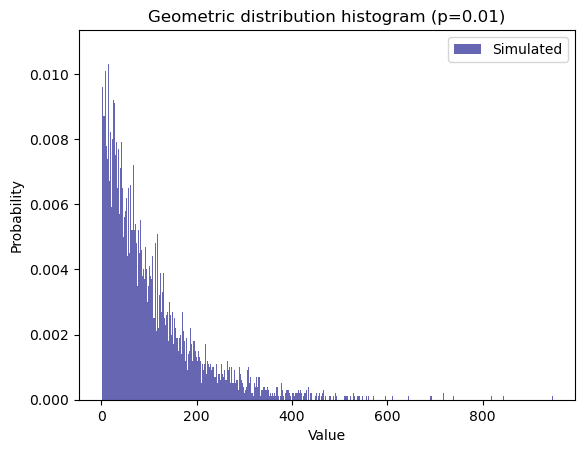

p = 0.01
Chi-square test p-value: 0.4279
Chi-square statistic: 301.7843
df: 298
Kolmogorov-Smirnov test p-value: 0.0076
KS value: 0.0167
----------------------------------------


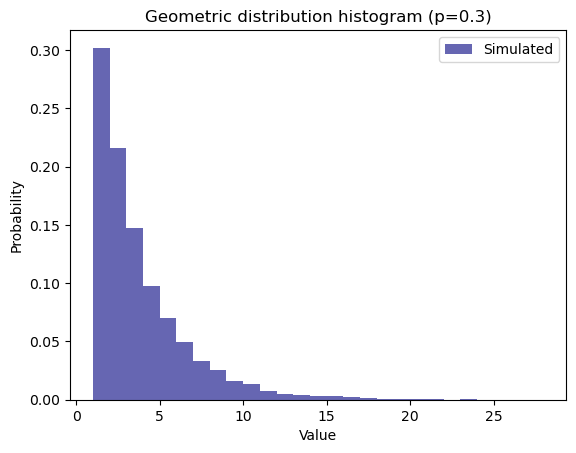

p = 0.3
Chi-square test p-value: 0.4208
Chi-square statistic: 17.5031
df: 17
Kolmogorov-Smirnov test p-value: 0.0000
KS value: 0.3000
----------------------------------------


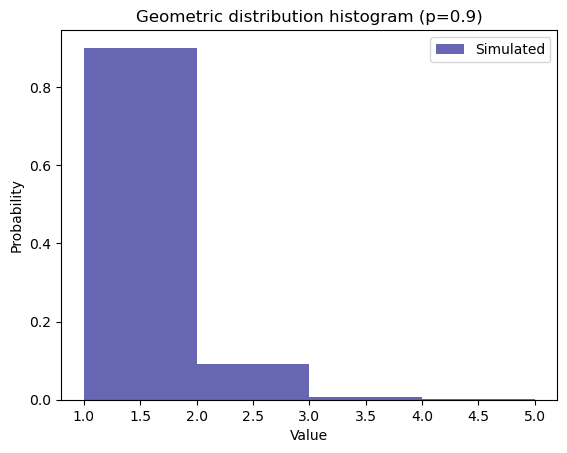

p = 0.9
Chi-square test p-value: 0.6652
Chi-square statistic: 1.5746
df: 3
Kolmogorov-Smirnov test p-value: 0.0000
KS value: 0.9000
----------------------------------------


In [416]:
p_values = [0.01, 0.3, 0.9]

for p in p_values:
    samples = np.random.geometric(p, size=10000)

    # Histogram
    plt.figure()
    plt.hist(samples, bins=range(1, np.max(samples)+1), density=True, alpha=0.6, color='navy', label='Simulated')
    
    k = np.arange(1, np.max(samples)+1)
    theoretical_pmf = geom.pmf(k, p)
    #plt.plot(k, theoretical_pmf, '-', label='Theoretical', linewidth=1, color='darkred')
    
    plt.title(f'Geometric distribution histogram (p={p})')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

    # Chi-square test
    observed_counts, _ = np.histogram(samples, bins=range(1, np.max(samples)+2))
    expected_counts = geom.pmf(k, p) * len(samples)

    # Align lengths and apply threshold for expected counts > 5
    valid = expected_counts > 5
    obs_valid = observed_counts[valid]
    exp_valid = expected_counts[valid]

    # Rescale expected to match observed sum
    exp_valid = exp_valid * obs_valid.sum() / exp_valid.sum()

    chi_stat, chi_p = chisquare(f_obs=obs_valid, f_exp=exp_valid)

    # KS test (compare with CDF directly)
    ks_stat, ks_p = kstest(samples, geom(p).cdf)

    print(f"p = {p}")
    print(f"Chi-square test p-value: {chi_p:.4f}")
    print(f"Chi-square statistic: {chi_stat:.4f}")
    print(f"df: {len(obs_valid) - 1}")
    print(f"Kolmogorov-Smirnov test p-value: {ks_p:.4f}")
    print(f"KS value: {ks_stat:.4f}")
    print("-" * 40)


#### Øvelse 2a

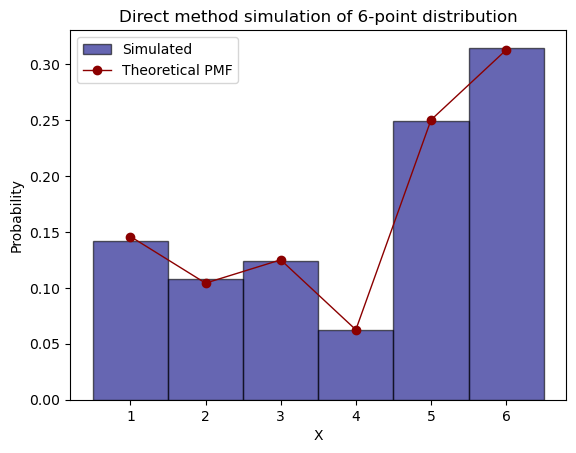

Chi-square test:
Statistic = 2.8174
p-value   = 0.7281
Degrees of freedom = 5


In [417]:
# Values and probabilities
X_values = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([7, 5, 6, 3, 12, 15]) / 48
cdf = np.cumsum(probs)

# Simulate using inverse transform
n = 10000
U = np.random.rand(n)
samples = np.zeros(n)

for i, u in enumerate(U):
    samples[i] = X_values[np.searchsorted(cdf, u)]

# Plot histogram
plt.hist(samples, bins=np.arange(1, 8)-0.5, edgecolor='black', density=True, label='Simulated', alpha=0.6, color='navy')
plt.xticks(X_values)
plt.plot(X_values, probs, 'o-', label='Theoretical PMF',color='darkred', linewidth=1)
plt.title('Direct method simulation of 6-point distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Chi-square test
observed_counts = np.array([(samples == x).sum() for x in X_values])
expected_counts = probs * n
chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Output result
print("Chi-square test:")
print(f"Statistic = {chi_stat:.4f}")
print(f"p-value   = {p_value:.4f}")
print(f"Degrees of freedom = {len(X_values) - 1}")


#### Øvelse 2b

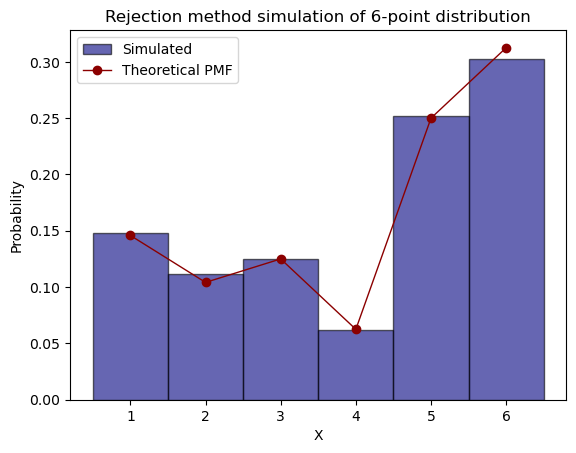

Chi-square test:
Statistic = 8.7061
p-value   = 0.1214
Degrees of freedom = 5


In [418]:
# Target distribution
X_values = np.array([1, 2, 3, 4, 5, 6])
p = np.array([7, 5, 6, 3, 12, 15]) / 48
q = np.ones(6) / 6
c = max(p / q)  # = 1.875

# Rejection sampling
n_samples = 10000
samples = []

while len(samples) < n_samples:
    x = np.random.randint(1, 7)  # Proposal from uniform 1-6
    u = np.random.rand()
    accept_prob = (p[x-1] / q[x-1]) / c
    if u <= accept_prob:
        samples.append(x)

samples = np.array(samples)

# Plot histogram
plt.hist(samples, bins=np.arange(1, 8)-0.5, edgecolor='black', density=True, label='Simulated', alpha=0.6, color='navy')
plt.xticks(X_values)
plt.plot(X_values, p, 'o-', label='Theoretical PMF', color='darkred', linewidth=1)
plt.title('Rejection method simulation of 6-point distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Chi-square test
observed_counts = np.array([(samples == x).sum() for x in X_values])
expected_counts = p * n_samples
chi_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print("Chi-square test:")
print(f"Statistic = {chi_stat:.4f}")
print(f"p-value   = {p_value:.4f}")
print(f"Degrees of freedom = {len(X_values) - 1}")


#### Øvelse 2c

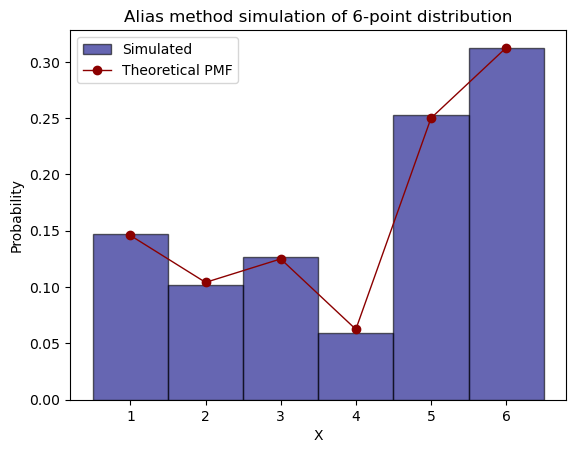

Chi-square test:
Statistic = 2.3930
p-value   = 0.7925
Degrees of freedom = 5


In [419]:
# Original distribution
X_values = np.array([1, 2, 3, 4, 5, 6])
probs = np.array([7, 5, 6, 3, 12, 15]) / 48
k = len(probs)

# Step 1: Create alias tables
F = probs * k  # Scaled probabilities
L = np.arange(k)  # Initialize alias table

# Work lists
small = [i for i in range(k) if F[i] < 1]
large = [i for i in range(k) if F[i] >= 1]

while small and large:
    s = small.pop()
    l = large.pop()

    L[s] = l
    F[l] = F[l] - (1 - F[s])

    if F[l] < 1:
        small.append(l)
    else:
        large.append(l)

# Step 2: Sampling function
def alias_sample(n, F, L):
    samples = np.zeros(n, dtype=int)
    for i in range(n):
        I = int(np.floor(k * np.random.rand()))
        U = np.random.rand()
        if U < F[I]:
            samples[i] = I + 1
        else:
            samples[i] = L[I] + 1
    return samples

# Run simulation
n_samples = 10000
samples = alias_sample(n_samples, F, L)

# Histogram and comparison
plt.hist(samples, bins=np.arange(1, 8)-0.5, density=True, edgecolor='black', label='Simulated', alpha=0.6, color='navy')
plt.plot(X_values, probs, 'o-', label='Theoretical PMF', color='darkred', linewidth=1)
plt.xticks(X_values)
plt.title('Alias method simulation of 6-point distribution')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Chi-square test
observed_counts = np.array([(samples == x).sum() for x in X_values])
expected_counts = probs * n_samples
chi_stat, p_val = chisquare(observed_counts, expected_counts)

print("Chi-square test:")
print(f"Statistic = {chi_stat:.4f}")
print(f"p-value   = {p_val:.4f}")
print(f"Degrees of freedom = {len(X_values) - 1}")


## Exercise 3

#### Exercise 3.1

Generate simulated values from the following distributions

A) Exponential distribution

b) Normal distribution (at least with standard Box-Mueller)

c) Pareto distribution, with β = 1 and experiment with different values of k values: k = 2.05, k = 2.5, k = 3 and k = 4.

Verify the results by comparing histograms with analytical results and perform tests for distribution type.

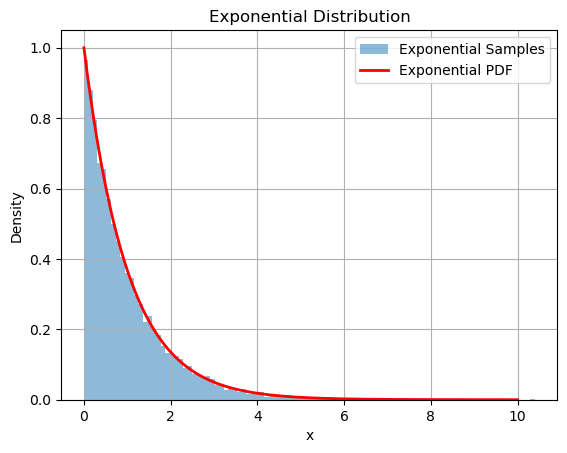

Exponential KS test: D = 0.0103, p = 0.2353


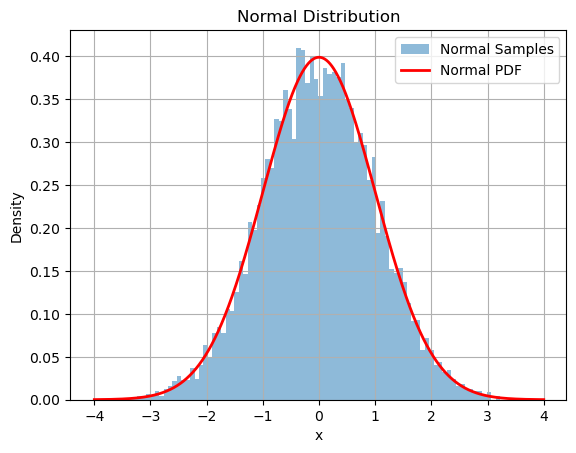

Normal KS test: D = 0.0067, p = 0.7657


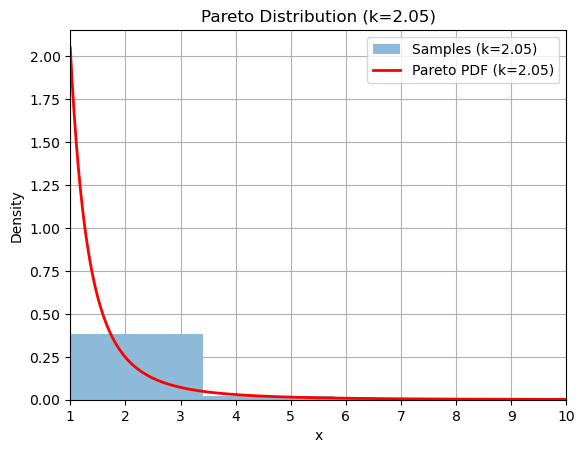

Pareto KS test (k=2.05): D = 0.0094, p = 0.3348


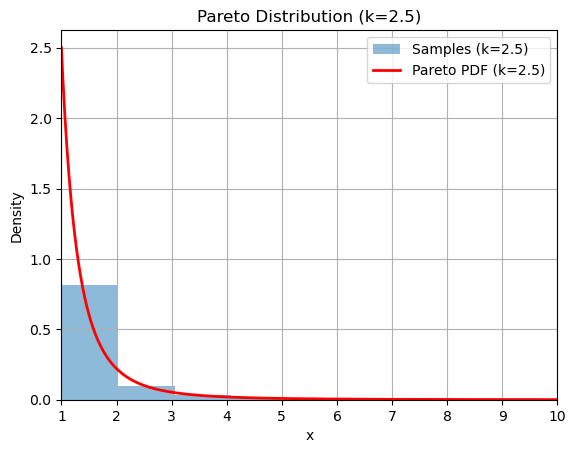

Pareto KS test (k=2.5): D = 0.0089, p = 0.4079


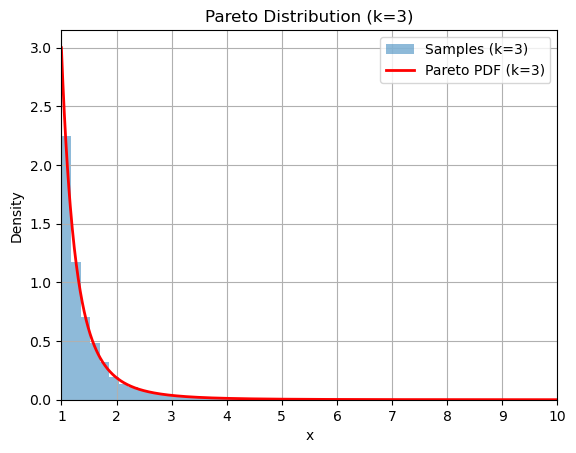

Pareto KS test (k=3): D = 0.0105, p = 0.2199


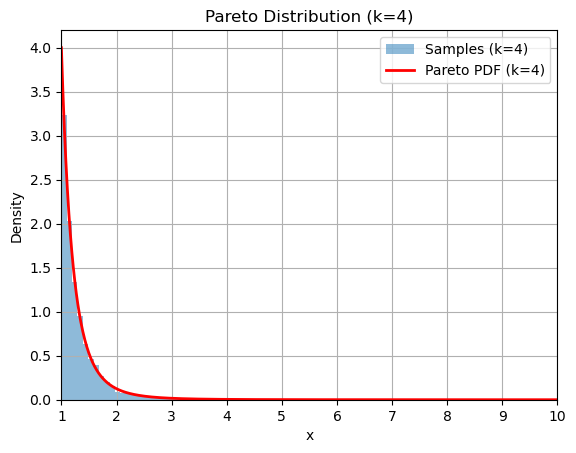

Pareto KS test (k=4): D = 0.0083, p = 0.4910


In [ ]:
##### Histogram for all distributions #####
n = 10000
x_vals = np.linspace(0, 10, 1000)

### a) Exponential Distribution ###
lam = 1
exp_samples = np.random.exponential(scale=1/lam, size=n)

# Histogram + analytical PDF
plt.hist(exp_samples, bins=100, density=True, alpha=0.5, label='Exponential Samples')
plt.plot(x_vals, expon.pdf(x_vals, scale=1/lam), 'r-', lw=2, label='Exponential PDF')
plt.title("Exponential Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# KS test
d_exp, p_exp = kstest(exp_samples, 'expon', args=(0, 1/lam))
print(f"Exponential KS test: D = {d_exp:.4f}, p = {p_exp:.4f}")


### b) Normal Distribution ###
def simulate_normal_box_muller(n):
    u1 = np.random.uniform(0, 1, n // 2)
    u2 = np.random.uniform(0, 1, n // 2)
    
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    
    z1 = r * np.cos(theta)
    z2 = r * np.sin(theta)
    
    samples = np.concatenate([z1, z2])
    
    if n % 2 == 1:
        # Generate one more if n is odd
        u1_extra = np.random.uniform(0, 1)
        u2_extra = np.random.uniform(0, 1)
        extra = np.sqrt(-2 * np.log(u1_extra)) * np.cos(2 * np.pi * u2_extra)
        samples = np.append(samples, extra)
    
    return samples

# Simulate 10,000 standard normal samples
norm_samples = simulate_normal_box_muller(10000)


# Histogram + analytical PDF
x_vals_n = np.linspace(-4, 4, 1000)
plt.hist(norm_samples, bins=100, density=True, alpha=0.5, label='Normal Samples')
plt.plot(x_vals_n, norm.pdf(x_vals_n, loc=0, scale=1), 'r-', lw=2, label='Normal PDF')
plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# KS test
d_norm, p_norm = kstest(norm_samples, 'norm', args=(0, 1))
print(f"Normal KS test: D = {d_norm:.4f}, p = {p_norm:.4f}")


### c) Pareto Distribution (for multiple k values) ###
k_values = [2.05, 2.5, 3, 4]
beta = 1.0
x_vals_p = np.linspace(1, 10, 1000)

for k in k_values:
    pareto_samples = beta * (np.random.uniform(0, 1, n) ** (-1 / k))
    
    # Histogram + analytical PDF
    plt.hist(pareto_samples, bins=100, density=True, alpha=0.5, label=f'Samples (k={k})')
    plt.plot(x_vals_p, pareto.pdf(x_vals_p, b=k, loc=0, scale=beta), 'r-', lw=2, label=f'Pareto PDF (k={k})')
    plt.title(f"Pareto Distribution (k={k})")
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.xlim(1, 10)
    plt.show()
    
    # KS test
    d_pareto, p_pareto = kstest(pareto_samples, 'pareto', args=(k, 0, beta))
    print(f"Pareto KS test (k={k}): D = {d_pareto:.4f}, p = {p_pareto:.4f}")



#### 3.2) Pareto Distribution – Compare Mean and Variance

For the Pareto distribution with support on \([ \beta, \infty [\), compare the **mean** and **variance** of simulated samples with the analytical expressions. The analytical expressions are:

- **Expected value** (mean), for \( k > 1 \):

$\mathbb{E}(X) = \frac{\beta k}{k - 1}$

- **Variance**, for \( k > 2 \):

$
\text{Var}(X) = \frac{\beta^2 k}{(k - 1)^2 (k - 2)}
$

### Task:
- Simulate samples using NumPy’s Pareto generator
- Compute empirical mean and variance
- Compare with analytical results for several values of \( k \in \{2.05,\ 2.5,\ 3,\ 4\} \)
- Explain any problems that occur (e.g. infinite variance or unstable estimates)


In [ ]:
def pareto_theoretical_mean_var(beta, k):
    mean = np.inf if k <= 1 else beta * k / (k - 1)
    var = np.inf if k <= 2 else (beta**2 * k) / ((k - 1)**2 * (k - 2))
    return mean, var

def simulate_and_compare(k_values, beta=1.0, n=10000):
    for k in k_values:
        samples = beta * (np.random.pareto(k, n) + 1)
        empirical_mean = np.mean(samples)
        empirical_var = np.var(samples)

        mean_theory, var_theory = pareto_theoretical_mean_var(beta, k)

        print(f"\nPareto(k={k}):")
        print(f"  Empirical mean      = {empirical_mean:.4f}")
        print(f"  Theoretical mean    = {mean_theory:.4f}")
        print(f"  Empirical variance  = {empirical_var:.4f}")
        print(f"  Theoretical variance= {var_theory:.4f}")

# Run the comparison
k_values = [2.05, 2.5, 3, 4]
simulate_and_compare(k_values)



Pareto(k=2.05):
  Empirical mean      = 1.9411
  Theoretical mean    = 1.9524
  Empirical variance  = 4.0036
  Theoretical variance= 37.1882

Pareto(k=2.5):
  Empirical mean      = 1.6580
  Theoretical mean    = 1.6667
  Empirical variance  = 1.6446
  Theoretical variance= 2.2222

Pareto(k=3):
  Empirical mean      = 1.5007
  Theoretical mean    = 1.5000
  Empirical variance  = 1.0387
  Theoretical variance= 0.7500

Pareto(k=4):
  Empirical mean      = 1.3279
  Theoretical mean    = 1.3333
  Empirical variance  = 0.1834
  Theoretical variance= 0.2222


#### 3.3) For the normal distribution generate 100 95% confidence intervals for the mean and variance, each based on 10 observations. Discuss the results.

In [443]:
n_intervals = 100
sample_size = 10
mu_true = 0
sigma2_true = 1

mean_contains = 0
var_contains = 0

mean_intervals = []
var_intervals = []



for _ in range(n_intervals):
    sample = simulate_normal_box_muller(sample_size)
    # Calculate sample mean and unbiased variance
    x_bar = np.mean(sample)
    s2 = np.var(sample, ddof=1)  # unbiased variance

    # 95% CI for mean using t-distribution
    t_crit = t.ppf(0.975, df=sample_size - 1)
    se = np.sqrt(s2 / sample_size)
    mean_ci = (x_bar - t_crit * se, x_bar + t_crit * se)
    mean_contains += mean_ci[0] <= mu_true <= mean_ci[1]
    mean_intervals.append(mean_ci)

    # 95% CI for variance using chi-squared distribution
    chi2_lower = chi2.ppf(0.025, df=sample_size - 1)
    chi2_upper = chi2.ppf(0.975, df=sample_size - 1)
    var_ci = ((sample_size - 1) * s2 / chi2_upper, (sample_size - 1) * s2 / chi2_lower)
    var_contains += var_ci[0] <= sigma2_true <= var_ci[1]
    var_intervals.append(var_ci)

print(f"Mean: {mean_contains}/100 intervals contained μ = {mu_true}")
print(f"Variance: {var_contains}/100 intervals contained σ² = {sigma2_true}")


Mean: 98/100 intervals contained μ = 0
Variance: 96/100 intervals contained σ² = 1


#### 3.4) Simulate from the Pareto distribution using composition.

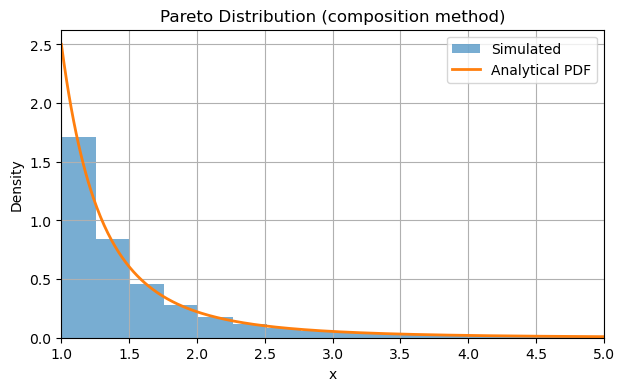

In [423]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(23798)

def pareto_composition(n, k=2.5, beta=1.0):
    u = np.random.uniform(0, 1, n)
    return beta * (u ** (-1 / k))

# Simulate samples
n = 10000
samples = pareto_composition(n, k=2.5, beta=1.0)

# Plot histogram and analytical PDF with subplots
x_vals = x_vals_p  # Use the already defined x_vals_p for consistency

plt.figure(figsize=(7, 4))
plt.hist(samples, bins=100, density=True, alpha=0.6, label='Simulated')
plt.plot(x_vals, (2.5 * 1.0**2.5) / (x_vals ** (2.5 + 1)) * (x_vals >= 1.0), label='Analytical PDF', linewidth=2)
plt.title('Pareto Distribution (composition method)')
plt.xlabel('x')
plt.ylabel('Density')
plt.xlim(1, 5)
plt.legend()
plt.grid(True)
plt.show()


## Exercise 4

#### Øvelse 1

In [453]:
# Parameters
m = 10
mean_service = 8
mean_interarrival = 1
num_customers = 10000
batches = 10

def simulate_batch():
    clock = 0
    busy_servers = 0
    blocked = 0
    event_list = []

    # Generating first arrival
    heapq.heappush(event_list, (np.random.exponential(mean_interarrival), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    # scheduling departure
                    service_time = np.random.exponential(mean_service)
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                # scheduling next arrival
                heapq.heappush(event_list, (clock + np.random.exponential(mean_interarrival), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    return blocked / num_customers

# Running simulation over batches
fractions = [simulate_batch() for _ in range(batches)]
mean_block = np.mean(fractions)
std_block = np.std(fractions, ddof=1)
conf_level = 0.95
t_value = norm.ppf(1 - (1 - conf_level) / 2)
ci_half_width = t_value * std_block / np.sqrt(batches)

print(f"Estimated blocking probability: {mean_block:.4f}")
print(f"{int(conf_level*100)}% CI: [{mean_block - ci_half_width:.4f}, {mean_block + ci_half_width:.4f}]")


Estimated blocking probability: 0.1172
95% CI: [0.1139, 0.1204]


#### Erlang B theory

In [454]:
def erlang_b(m, A):
    numerator = A**m / factorial(m)
    denominator = sum((A**k) / factorial(k) for k in range(m + 1))
    return numerator / denominator

print(f"Erlang B (exact): {erlang_b(10, 8):.4f}")

Erlang B (exact): 0.1217


#### Øvelse 2a

In [426]:
import numpy as np
import heapq
from scipy.stats import norm

np.random.seed(237)

# Parameters
m = 10  # number of servers
mean_service = 8
num_customers = 10000
batches = 10
shape_k = 2  # Erlang shape parameter
lambda_erlang = shape_k  # to keep mean = 1

def erlang_arrival(mean=1):
    """Generate one Erlang(k, lambda) arrival time"""
    return np.sum(np.random.exponential(1 / lambda_erlang, shape_k))

def simulate_batch_erlang():
    clock = 0
    busy_servers = 0
    blocked = 0
    event_list = []

    # First arrival
    heapq.heappush(event_list, (erlang_arrival(), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    service_time = np.random.exponential(mean_service)
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                heapq.heappush(event_list, (clock + erlang_arrival(), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    return blocked / num_customers

# Run simulation in batches
fractions = [simulate_batch_erlang() for _ in range(batches)]
mean_block = np.mean(fractions)
std_block = np.std(fractions, ddof=1)
t_value = norm.ppf(0.975)
ci_half_width = t_value * std_block / np.sqrt(batches)

print(f"Erlang Interarrival (k={shape_k})")
print(f"Estimated blocking probability: {mean_block:.4f}")
print(f"95% CI: [{mean_block - ci_half_width:.4f}, {mean_block + ci_half_width:.4f}]")


Erlang Interarrival (k=2)
Estimated blocking probability: 0.0937
95% CI: [0.0917, 0.0958]


#### Øvelse 2b

In [460]:
# Parameters
m = 10
mean_service = 8
num_customers = 10000
batches = 10

# Hyper-exponential parameters
p1, lambda1 = 0.8, 0.8333
p2, lambda2 = 0.2, 5.0

def hyper_exponential_arrival():
    """Generate one hyper-exponential inter-arrival time"""
    if np.random.rand() < p1:
        return np.random.exponential(1 / lambda1)
    else:
        return np.random.exponential(1 / lambda2)

def simulate_batch_hyperexp():
    clock = 0
    busy_servers = 0
    blocked = 0
    event_list = []

    heapq.heappush(event_list, (hyper_exponential_arrival(), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    service_time = np.random.exponential(mean_service)
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                heapq.heappush(event_list, (clock + hyper_exponential_arrival(), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    return blocked / num_customers

# Run simulation in batches
fractions = [simulate_batch_hyperexp() for _ in range(batches)]
mean_block = np.mean(fractions)
std_block = np.std(fractions, ddof=1)
t_value = norm.ppf(0.975)
ci_half_width = t_value * std_block / np.sqrt(batches)

print("Hyper-exponential Interarrival")
print(f"Estimated blocking probability: {mean_block:.4f}")
print(f"95% CI: [{mean_block - ci_half_width:.4f}, {mean_block + ci_half_width:.4f}]")


Hyper-exponential Interarrival
Estimated blocking probability: 0.1398
95% CI: [0.1364, 0.1431]


#### Øvelse 3

In [462]:
# Constants
m = 10
mean_service = 8
num_customers = 10000
batches = 10

def exponential_arrival():
    return np.random.exponential(1)

def constant_service():
    return mean_service

def pareto_service(k):
    xm = mean_service * (k - 1) / k  # To get E[X] = mean_service
    return (np.random.pareto(k) + 1) * xm

# Compute mu for given sigma
sigma_logn = 0.6
mu_logn = np.log(mean_service) - 0.5 * sigma_logn**2

def lognormal_service():
    return np.random.lognormal(mean=mu_logn, sigma=sigma_logn)

def simulate_batch(service_sampler):
    clock = 0
    busy_servers = 0
    blocked = 0
    event_list = []

    heapq.heappush(event_list, (exponential_arrival(), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    service_time = service_sampler()
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                heapq.heappush(event_list, (clock + exponential_arrival(), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    return blocked / num_customers

def simulate_all(service_sampler, label):
    fractions = [simulate_batch(service_sampler) for _ in range(batches)]
    mean_block = np.mean(fractions)
    std_block = np.std(fractions, ddof=1)
    t_value = norm.ppf(0.975)
    ci_half_width = t_value * std_block / np.sqrt(batches)
    print(f"{label}")
    print(f"Estimated blocking probability: {mean_block:.4f}")
    print(f"95% CI: [{mean_block - ci_half_width:.4f}, {mean_block + ci_half_width:.4f}]")
    print()

# Run simulations
simulate_all(constant_service, "Constant service time")
simulate_all(lambda: pareto_service(1.05), "Pareto service time (k=1.05)")
simulate_all(lambda: pareto_service(2.05), "Pareto service time (k=2.05)")
simulate_all(lambda: lognormal_service(), "Lognormal service time (sigma=0.6)")



Constant service time
Estimated blocking probability: 0.1212
95% CI: [0.1196, 0.1228]

Pareto service time (k=1.05)
Estimated blocking probability: 0.0016
95% CI: [0.0003, 0.0029]

Pareto service time (k=2.05)
Estimated blocking probability: 0.1166
95% CI: [0.1139, 0.1194]

Lognormal service time (sigma=0.6)
Estimated blocking probability: 0.1200
95% CI: [0.1175, 0.1226]



## Exercise 5

**Variance Reduction Methods**

1. **Estimate the integral**  
   $ \int_0^1 e^x \, dx $  
   by simulation (the crude Monte Carlo estimator).  
   Use an estimator based on 100 samples and present the result as both a point estimator and a confidence interval.



In [463]:
# Settings
n = 100
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Crude Monte Carlo estimation
x = np.random.uniform(0, 1, n)
fx = np.exp(x)
estimate = np.mean(fx)
std_error = np.std(fx, ddof=1) / np.sqrt(n)

# Confidence interval
ci_lower = estimate - z * std_error
ci_upper = estimate + z * std_error

# True value (for reference)
true_value = np.exp(1) - 1

# Print results
print(f"Crude Monte Carlo estimate: {estimate:.5f}")
print(f"95% CI: ({ci_lower:.5f}, {ci_upper:.5f})")
print(f"True value: {true_value:.5f}")


Crude Monte Carlo estimate: 1.73280
95% CI: (1.63979, 1.82581)
True value: 1.71828


2. **Estimate the integral**  
   $ \int_0^1 e^x \, dx $  
   using **antithetic variables**, with comparable computational resources.



In [430]:
import numpy as np
from scipy.stats import norm

# Settings
seed = 42
np.random.seed(seed)
n = 50  # 50 pairs → 100 function evaluations
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Antithetic sampling
u = np.random.uniform(0, 1, n)
antithetic = 0.5 * (np.exp(u) + np.exp(1 - u))

# Estimate and confidence interval
estimate = np.mean(antithetic)
std_error = np.std(antithetic, ddof=1) / np.sqrt(n)
ci_lower = estimate - z * std_error
ci_upper = estimate + z * std_error

# True value
true_value = np.exp(1) - 1

# Print results
print(f"Antithetic estimate: {estimate:.5f}")
print(f"95% CI: ({ci_lower:.5f}, {ci_upper:.5f})")
print(f"True value: {true_value:.5f}")


Antithetic estimate: 1.71943
95% CI: (1.70197, 1.73689)
True value: 1.71828


3. **Estimate the integral**  
   $ \int_0^1 e^x \, dx $  
   using a **control variable**, with comparable computational resources.



In [431]:
# Settings
seed = 42
np.random.seed(seed)
n = 100
alpha = 0.05
z = norm.ppf(1 - alpha / 2)

# Generate data
x = np.random.uniform(0, 1, n)
y = np.exp(x)
g = x
mu_g = 0.5

# Estimate optimal c from sample
cov_y_g = np.cov(y, g, ddof=1)[0, 1]
var_g = np.var(g, ddof=1)
c_opt = cov_y_g / var_g

# Apply control variate correction
adjusted_y = y - c_opt * (g - mu_g)

# Estimate and confidence interval
estimate = np.mean(adjusted_y)
std_error = np.std(adjusted_y, ddof=1) / np.sqrt(n)
ci_lower = estimate - z * std_error
ci_upper = estimate + z * std_error

# True value
true_value = np.exp(1) - 1

# Print results
print(f"Control variate estimate: {estimate:.5f}")
print(f"95% CI: ({ci_lower:.5f}, {ci_upper:.5f})")
print(f"True value: {true_value:.5f}")


Control variate estimate: 1.72180
95% CI: (1.70963, 1.73398)
True value: 1.71828


4. **Estimate the integral**  
   $ \int_0^1 e^x \, dx $  
   using **stratified sampling**, with comparable computational resources.



In [432]:
np.random.seed(seed)
m = 100  # number of strata = number of samples
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Stratified sampling
samples = np.array([
    np.random.uniform(i/m, (i+1)/m) for i in range(m)
])
fx = np.exp(samples)

# Estimate and CI
estimate = np.mean(fx)
std_error = np.std(fx, ddof=1) / np.sqrt(m)
ci_lower = estimate - z * std_error
ci_upper = estimate + z * std_error

# True value
true_value = np.exp(1) - 1

# Print results
print(f"Stratified sampling estimate: {estimate:.5f}")
print(f"95% CI: ({ci_lower:.5f}, {ci_upper:.5f})")
print(f"True value: {true_value:.5f}")


Stratified sampling estimate: 1.71779
95% CI: (1.62091, 1.81468)
True value: 1.71828


5. **Use control variates** to reduce the variance of the estimator in Exercise 4 (Poisson arrivals).



In [433]:
# Parameters
m = 10
mean_service = 8
mean_interarrival = 1
num_customers = 10000
batches = 10

# Storage
blocks = []
controls = []

def simulate_batch():
    clock = 0
    busy_servers = 0
    blocked = 0
    control_stat = 0
    event_list = []

    # First arrival
    heapq.heappush(event_list, (np.random.exponential(mean_interarrival), 'arrival'))

    for _ in range(num_customers):
        while event_list:
            time, event = heapq.heappop(event_list)
            clock = time

            if event == 'arrival':
                if busy_servers < m:
                    busy_servers += 1
                    service_time = np.random.exponential(mean_service)
                    heapq.heappush(event_list, (clock + service_time, 'departure'))
                else:
                    blocked += 1
                    control_stat += 1  # add to control variable
                heapq.heappush(event_list, (clock + np.random.exponential(mean_interarrival), 'arrival'))
                break
            elif event == 'departure':
                busy_servers -= 1

    blocks.append(blocked / num_customers)
    controls.append(control_stat / num_customers)  # normalize for consistency

# Run batches
for _ in range(batches):
    simulate_batch()

# Control variate adjustment
Y = np.array(blocks)
X = np.array(controls)
mu_X = np.mean(X)  # Could use analytical if known

# Estimate optimal c
cov_YX = np.cov(Y, X, ddof=1)[0, 1]
var_X = np.var(X, ddof=1)
c_opt = cov_YX / var_X

# Apply control variate correction
Y_cv = Y - c_opt * (X - mu_X)

# Estimate
mean_naive = np.mean(Y)
mean_cv = np.mean(Y_cv)
std_naive = np.std(Y, ddof=1)
std_cv = np.std(Y_cv, ddof=1)
conf_level = 0.95
z = norm.ppf(1 - (1 - conf_level) / 2)
ci_naive = (mean_naive - z * std_naive / np.sqrt(batches),
            mean_naive + z * std_naive / np.sqrt(batches))
ci_cv = (mean_cv - z * std_cv / np.sqrt(batches),
         mean_cv + z * std_cv / np.sqrt(batches))

# Results
print(f"Naive estimate: {mean_naive:.5f} ± {z * std_naive / np.sqrt(batches):.5f}")
print(f"CV estimate   : {mean_cv:.5f} ± {z * std_cv / np.sqrt(batches):.5f}")
print(f"95% CI (naive): [{ci_naive[0]:.5f}, {ci_naive[1]:.5f}]")
print(f"95% CI (CV)   : [{ci_cv[0]:.5f}, {ci_cv[1]:.5f}]")


Naive estimate: 0.11867 ± 0.00387
CV estimate   : 0.11867 ± 0.00000
95% CI (naive): [0.11480, 0.12254]
95% CI (CV)   : [0.11867, 0.11867]


6. **Demonstrate the effect of using common random numbers** in Exercise 4 for:
   - The difference between Poisson arrivals (**Part 1**), and  
   - A **renewal process with hyperexponential interarrival times**.  

   **Remark:** You might need to do some thinking and some re-programming.

In [ ]:
# Parameters
m = 10
mean_service = 8
num_customers = 10000

# Hyperexponential parameters
p1, lambda1 = 0.8, 0.8333
p2, lambda2 = 0.2, 5.0

# Generate common random numbers
service_times = np.random.exponential(mean_service, size=num_customers)
u_hyper_choice = np.random.rand(num_customers)
expo1 = np.random.exponential(1 / lambda1, size=num_customers)
expo2 = np.random.exponential(1 / lambda2, size=num_customers)
interarrivals_poisson = np.random.exponential(1, size=num_customers)

interarrivals_hyper = np.where(u_hyper_choice < p1, expo1, expo2)

arrival_poisson = np.cumsum(interarrivals_poisson)
arrival_hyper = np.cumsum(interarrivals_hyper)

def simulate_blocking(arrival_times, service_times, m):
    clock = 0
    busy = 0
    blocked = 0
    queue = []

    i = 0  # index into arrival_times
    event_list = []

    heapq.heappush(event_list, (arrival_times[0], 'arrival', 0))

    while i < len(arrival_times) or event_list:
        time, event, idx = heapq.heappop(event_list)
        clock = time

        if event == 'arrival':
            if busy < m:
                busy += 1
                heapq.heappush(event_list, (clock + service_times[idx], 'departure', idx))
            else:
                blocked += 1
            i += 1
            if i < len(arrival_times):
                heapq.heappush(event_list, (arrival_times[i], 'arrival', i))
        elif event == 'departure':
            busy -= 1

    return blocked / num_customers

# Run both simulations with CRNs
block_poisson = simulate_blocking(arrival_poisson, service_times, m)
block_hyper = simulate_blocking(arrival_hyper, service_times, m)

print(f"Blocking (Poisson): {block_poisson:.4f}")
print(f"Blocking (Hyperexp): {block_hyper:.4f}")
print(f"Difference (CRNs): {block_poisson - block_hyper:.4f}")


Blocking (Poisson): 0.1245
Blocking (Hyperexp): 0.1411
Difference (CRNs): -0.0166


7. **For a standard normal random variable** $Z \sim \mathcal{N}(0, 1)$ using the crude Monte Carlo estimator, estimate the probability $Z > a$.  
   Then try **importance sampling** with a normal density with mean $a$ and variance $\sigma^2$.  
   For the experiments, start using $\sigma^2 = 1$, use different values of $a$ (e.g. 2 and 4), and different sample sizes.  
   If time permits, experiment with other values for $\sigma^2$.  
   Finally, discuss the efficiency of the methods.




In [ ]:
# Parameters
a = 4
n = 10000
sigma2 = 1

# --- Crude Monte Carlo ---
z = np.random.normal(0, 1, size=n)
p_crude = np.mean(z > a)
se_crude = np.std(z > a, ddof=1) / np.sqrt(n)

# --- Importance Sampling ---
x = np.random.normal(a, np.sqrt(sigma2), size=n)
# likelihood ratio for sigma^2 = 1
weights = np.exp((x - a)**2 / 2 - x**2 / 2)
p_is = np.mean((x > a) * weights)
se_is = np.std((x > a) * weights, ddof=1) / np.sqrt(n)

# True value
p_true = 1 - norm.cdf(a)

print(f"True value: {p_true:.8f}")
print(f"Crude MC:  {p_crude:.8f} ± {1.96 * se_crude:.8f}")
print(f"IS MC:     {p_is:.8f} ± {1.96 * se_is:.8f}")


True value: 0.00003167
Crude MC:  0.00000000 ± 0.00000000
IS MC:     0.00003117 ± 0.00000133


8. **Use importance sampling** with $g(x) = \lambda \exp(-\lambda x)$ to calculate the integral  
   $\int_0^1 e^x dx$ of Question 1.  
   Try to find the optimal value of $\lambda$ by calculating the variance of  
   $h(X) f(X)/g(X)$ and verify by simulation.  
   **Note:** importance sampling with the exponential distribution will not reduce the variance.



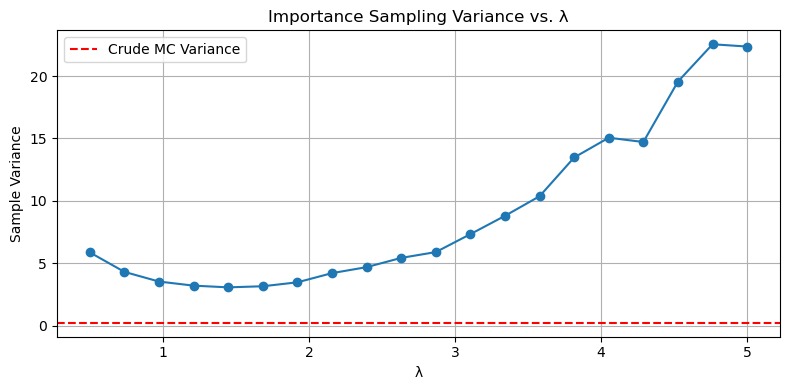

In [ ]:
def is_estimate(lambda_val, n_samples=10000):
    # Sample from Exponential(lambda)
    x = np.random.exponential(scale=1/lambda_val, size=n_samples)
    # Weight function: integrand (e^x) * indicator / g(x)
    weights = (x <= 1) * np.exp(x) / (lambda_val * np.exp(-lambda_val * x))
    estimate = np.mean(weights)
    variance = np.var(weights, ddof=1)
    return estimate, variance

# Try different lambda values
lambdas = np.linspace(0.5, 5, 20)
estimates = []
variances = []

for lam in lambdas:
    est, var = is_estimate(lam)
    estimates.append(est)
    variances.append(var)

# Plot variance vs. lambda
plt.figure(figsize=(8, 4))
plt.plot(lambdas, variances, marker='o')
plt.axhline(y=0.242, color='r', linestyle='--', label='Crude MC Variance')
plt.title('Importance Sampling Variance vs. λ')
plt.xlabel('λ')
plt.ylabel('Sample Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


9. **For the Pareto case**, derive the IS estimator for the mean using the **first moment distribution** as the sampling distribution.  
   Is the approach meaningful? Could this be done in general?  
   With this insight, how could you change the choice of $g(x)$ in the previous question?

## Exercise 6

#### Øvelse 1

/var/folders/1s/nzp674112bx_s_d3fgsdc_ph0000gn/T/ipykernel_1636/1725032453.py:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (A ** i) / np.math.factorial(i)


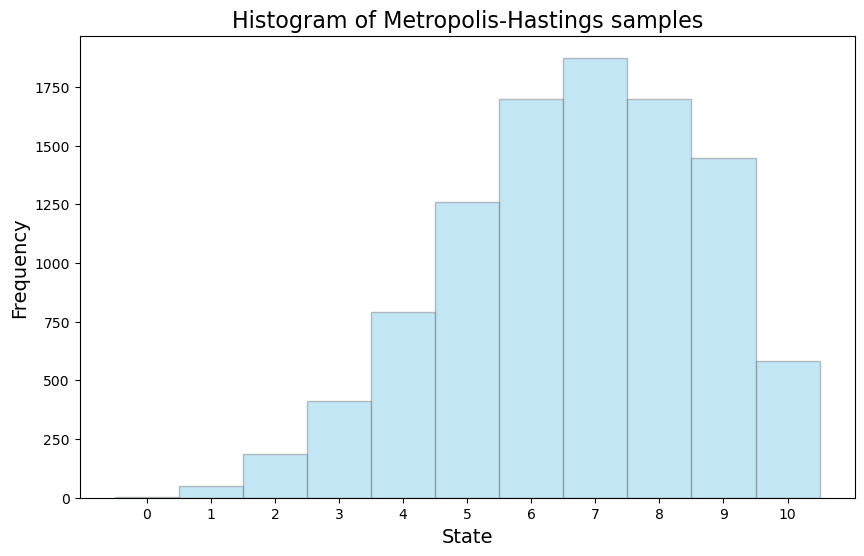

Chi-square statistic: 448.4765
p-value: 0.0000
Degrees of freedom: 10


In [471]:
# Parameters from Exercise 4
A = 8
m = 10
num_samples = 10000
burn_in = 2000

# Defining the unnormalized target distribution
def target_pmf(i):
    return (A ** i) / np.math.factorial(i)

# Metropolis-Hastings algorithm
def metropolis_hastings(A, m, num_samples, burn_in):
    samples = []
    current = np.random.randint(0, m+1)

    for _ in range(num_samples + burn_in):
        # Propose a new state
        if current == 0:
            proposal = current + 1
        elif current == m:
            proposal = current - 1
        else:
            proposal = current + np.random.choice([-1, 1])

        # Computing acceptance ratio
        ratio = target_pmf(proposal) / target_pmf(current)
        alpha = min(1, ratio)

        if np.random.rand() < alpha:
            current = proposal

        samples.append(current)

    return np.array(samples[burn_in:])

# Running the simulation
samples = metropolis_hastings(A, m, num_samples, burn_in)

# Hhistogram of the samples
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(samples, bins=np.arange(m+2)-0.5, density=False, alpha=0.5, edgecolor='grey', color='skyblue')
plt.xticks(np.arange(m+1))
plt.title("Histogram of Metropolis-Hastings samples", fontsize=16)
plt.xlabel("State", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

# Chi test
observed_counts = counts
expected_probs = np.array([target_pmf(i) for i in range(m+1)])
expected_probs /= expected_probs.sum()  # normalizing
expected_counts = expected_probs * num_samples

# Chi-square statistics
chi_square_stat = ((observed_counts - expected_counts) ** 2 / expected_counts).sum()
df = m  # degrees of freedom
p_value = 1 - chi2.cdf(chi_square_stat, df)

print(f"Chi-square statistic: {chi_square_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {df}")


#### Øvelse 2 a, b, c

In [501]:
# 2a
# Parameters
A1 = A2 = 4
m = 10
num_samples = 10000
burn_in = 2000  # recommended to improve convergence

# Unnormalized joint distribution
def target_pmf(i, j):
    if i < 0 or j < 0 or i + j > m:
        return 0
    return (A1 ** i) / factorial(i) * (A2 ** j) / factorial(j)

# Proposal: random walk in 8 directions (symmetric)
def propose(i, j):
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1),
             (-1, -1), (-1, 1), (1, -1), (1, 1)]
    np.random.shuffle(moves)
    for di, dj in moves:
        ni, nj = i + di, j + dj
        if 0 <= ni <= m and 0 <= nj <= m and ni + nj <= m:
            return ni, nj
    return i, j  # no valid move found

# Metropolis-Hastings sampler
def mh_joint_distribution(A1, A2, m, num_samples, burn_in):
    samples = []
    i, j = 0, 0  # starting state

    for _ in range(num_samples + burn_in):
        i_new, j_new = propose(i, j)
        f_old = target_pmf(i, j)
        f_new = target_pmf(i_new, j_new)
        alpha = min(1, f_new / f_old) if f_old > 0 else 1

        if np.random.rand() < alpha:
            i, j = i_new, j_new

        samples.append((i, j))

    return np.array(samples[burn_in:])

# Run the sampler
samples = mh_joint_distribution(A1, A2, m, num_samples, burn_in)

# Re-run sampling (samples were lost due to kernel reset)
def mh_joint_distribution(A1, A2, m, num_samples, burn_in):
    samples = []
    i, j = 0, 0  # starting state

    for _ in range(num_samples + burn_in):
        i_new, j_new = propose(i, j)
        f_old = target_pmf(i, j)
        f_new = target_pmf(i_new, j_new)
        alpha = min(1, f_new / f_old) if f_old > 0 else 1

        if np.random.rand() < alpha:
            i, j = i_new, j_new

        samples.append((i, j))

    return np.array(samples[burn_in:])

# Generate samples again
samples = mh_joint_distribution(A1, A2, m, num_samples, burn_in)

# Compute observed frequencies from samples
observed = np.zeros((m + 1, m + 1))
for i, j in samples:
    observed[i, j] += 1

# Compute chi-squared statistic
chi2_stat = 0
df = 0
for i in range(m + 1):
    for j in range(m + 1 - i):
        if expected[i, j] >= 5:
            chi2_stat += (observed[i, j] - expected[i, j]) ** 2 / expected[i, j]
            df += 1

df -= 1
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.4f}")


Chi-squared statistic: 369.6340
Degrees of freedom: 60
p-value: 0.0000


In [ ]:
# 2b
# Unnormalized joint distribution
def target_pmf(i, j):
    if i < 0 or j < 0 or i + j > m:
        return 0
    return (A1 ** i) / factorial(i) * (A2 ** j) / factorial(j)

# Coordinate-wise Metropolis-Hastings sampler
def mh_coordinatewise(A1, A2, m, num_samples, burn_in):
    samples = []
    i, j = 0, 0  # initial state

    for _ in range(num_samples + burn_in):
        # Step 1: Propose change in i
        i_new = i + np.random.choice([-1, 1])
        if 0 <= i_new <= m and i_new + j <= m:
            alpha_i = min(1, target_pmf(i_new, j) / target_pmf(i, j))
            if np.random.rand() < alpha_i:
                i = i_new

        # Step 2: Propose change in j
        j_new = j + np.random.choice([-1, 1])
        if 0 <= j_new <= m and i + j_new <= m:
            alpha_j = min(1, target_pmf(i, j_new) / target_pmf(i, j))
            if np.random.rand() < alpha_j:
                j = j_new

        samples.append((i, j))

    return np.array(samples[burn_in:])

# Compute expected frequencies for chi-squared test
expected = np.zeros((m+1, m+1))
Z = sum(target_pmf(i, j) for i in range(m + 1) for j in range(m + 1 - i))
for i in range(m + 1):
    for j in range(m + 1 - i):
        expected[i, j] = target_pmf(i, j) / Z * num_samples

# Run coordinate-wise MH
samples_2b = mh_coordinatewise(A1, A2, m, num_samples, burn_in)

# Count observed frequencies
heatmap_2b = np.zeros((m+1, m+1))
for i, j in samples_2b:
    heatmap_2b[i, j] += 1

# Compute chi-squared statistic
chi2_stat_2b = 0
df_2b = 0
for i in range(m + 1):
    for j in range(m + 1 - i):
        if expected[i, j] >= 5:
            obs = heatmap_2b[i, j]
            exp = expected[i, j]
            chi2_stat_2b += (obs - exp) ** 2 / exp
            df_2b += 1

p_value_2b = 1 - chi2.cdf(chi2_stat_2b, df_2b - 1)
chi2_stat_2b, p_value_2b

print(f"Chi-squared: {chi2_stat_2b:.4f}")
print(f"P-value: {p_value_2b:.4f}")
print(f"Degrees of freedom: {df_2b - 1}")

Chi-squared: 75.3027
P-value: 0.0000
Degrees of freedom: 33


In [481]:
# 2c

# Gibbs sampling implementation
def gibbs_sampler(A1, A2, m, num_samples, burn_in):
    samples = []
    i, j = 0, 0  # Initial state

    for _ in range(num_samples + burn_in):
        # Sample i | j
        max_i = m - j
        weights_i = np.array([(A1**ii / factorial(ii)) for ii in range(max_i + 1)])
        probs_i = weights_i / weights_i.sum()
        i = np.random.choice(np.arange(max_i + 1), p=probs_i)

        # Sample j | i
        max_j = m - i
        weights_j = np.array([(A2**jj / factorial(jj)) for jj in range(max_j + 1)])
        probs_j = weights_j / weights_j.sum()
        j = np.random.choice(np.arange(max_j + 1), p=probs_j)

        samples.append((i, j))

    return np.array(samples[burn_in:])

# Run Gibbs sampler
samples_2c = gibbs_sampler(A1, A2, m, num_samples, burn_in)

# Count observed frequencies
heatmap_2c = np.zeros((m+1, m+1))
for i, j in samples_2c:
    heatmap_2c[i, j] += 1

# Compute chi-squared statistic
chi2_stat_2c = 0
df_2c = 0
for i in range(m + 1):
    for j in range(m + 1 - i):
        if expected[i, j] >= 5:
            obs = heatmap_2c[i, j]
            exp = expected[i, j]
            chi2_stat_2c += (obs - exp) ** 2 / exp
            df_2c += 1

p_value_2c = 1 - chi2.cdf(chi2_stat_2c, df_2c - 1)
chi2_stat_2c, p_value_2c

print(f"Chi-squared (Gibbs): {chi2_stat_2c:.4f}")
print(f"P-value (Gibbs): {p_value_2c:.4f}")
print(f"Degrees of freedom (Gibbs): {df_2c - 1}")

Chi-squared (Gibbs): 32.0545
P-value (Gibbs): 0.5140
Degrees of freedom (Gibbs): 33


ValueError: bottom cannot be >= top

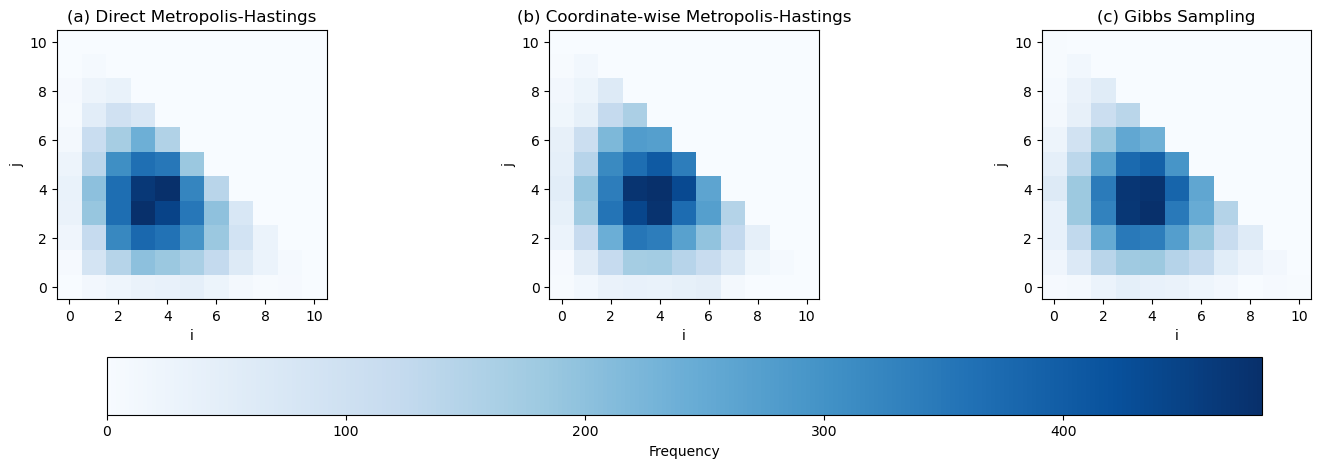

In [492]:

# Target distribution
def target_pmf(i, j):
    if i < 0 or j < 0 or i + j > m:
        return 0
    return (A1**i / factorial(i)) * (A2**j / factorial(j))

# Expected frequencies
expected = np.zeros((m + 1, m + 1))
Z = sum(target_pmf(i, j) for i in range(m + 1) for j in range(m + 1 - i))
for i in range(m + 1):
    for j in range(m + 1 - i):
        expected[i, j] = target_pmf(i, j) / Z * num_samples

# (a) Direct Metropolis-Hastings
def propose(i, j):
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1),
             (-1, -1), (-1, 1), (1, -1), (1, 1)]
    np.random.shuffle(moves)
    for di, dj in moves:
        ni, nj = i + di, j + dj
        if 0 <= ni <= m and 0 <= nj <= m and ni + nj <= m:
            return ni, nj
    return i, j

def mh_direct():
    samples = []
    i, j = 0, 0
    for _ in range(num_samples + burn_in):
        i_new, j_new = propose(i, j)
        f_new = target_pmf(i_new, j_new)
        f_old = target_pmf(i, j)
        alpha = min(1, f_new / f_old) if f_old > 0 else 1
        if np.random.rand() < alpha:
            i, j = i_new, j_new
        samples.append((i, j))
    return np.array(samples[burn_in:])

# (b) Coordinate-wise Metropolis-Hastings
def mh_coordinatewise():
    samples = []
    i, j = 0, 0
    for _ in range(num_samples + burn_in):
        i_new = i + np.random.choice([-1, 1])
        if 0 <= i_new <= m and i_new + j <= m:
            alpha_i = min(1, target_pmf(i_new, j) / target_pmf(i, j))
            if np.random.rand() < alpha_i:
                i = i_new
        j_new = j + np.random.choice([-1, 1])
        if 0 <= j_new <= m and i + j_new <= m:
            alpha_j = min(1, target_pmf(i, j_new) / target_pmf(i, j))
            if np.random.rand() < alpha_j:
                j = j_new
        samples.append((i, j))
    return np.array(samples[burn_in:])

# (c) Gibbs sampler
def gibbs_sampler():
    samples = []
    i, j = 0, 0
    for _ in range(num_samples + burn_in):
        max_i = m - j
        weights_i = np.array([A1**ii / factorial(ii) for ii in range(max_i + 1)])
        probs_i = weights_i / weights_i.sum()
        i = np.random.choice(np.arange(max_i + 1), p=probs_i)

        max_j = m - i
        weights_j = np.array([A2**jj / factorial(jj) for jj in range(max_j + 1)])
        probs_j = weights_j / weights_j.sum()
        j = np.random.choice(np.arange(max_j + 1), p=probs_j)

        samples.append((i, j))
    return np.array(samples[burn_in:])

# Run all samplers
samples_a = mh_direct()
samples_b = mh_coordinatewise()
samples_c = gibbs_sampler()

# Count frequencies
def count_heatmap(samples):
    heatmap = np.zeros((m + 1, m + 1))
    for i, j in samples:
        heatmap[i, j] += 1
    return heatmap

heatmap_a = count_heatmap(samples_a)
heatmap_b = count_heatmap(samples_b)
heatmap_c = count_heatmap(samples_c)

# Plot all in one figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['(a) Direct Metropolis-Hastings',
          '(b) Coordinate-wise Metropolis-Hastings',
          '(c) Gibbs Sampling']
heatmaps = [heatmap_a, heatmap_b, heatmap_c]

for ax, heatmap, title in zip(axes, heatmaps, titles):
    im = ax.imshow(heatmap, origin='lower', cmap='Blues', extent=[-0.5, m+0.5, -0.5, m+0.5])
    ax.set_title(title)
    ax.set_xlabel('i')
    ax.set_ylabel('j')

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal', location='bottom')
cbar.set_label('Frequency')
plt.subplots_adjust(bottom=0.9, wspace=0.3)

plt.tight_layout()
plt.show()


#### Øvelse 3

In [440]:
# a
# Parameters for the bivariate normal
rho = 0.5
mean = [0, 0]
cov = [[1, rho], [rho, 1]]

# Draw one sample from the bivariate normal distribution
xi_gamma = np.random.multivariate_normal(mean, cov)

# Transform to (theta, psi)
theta = np.exp(xi_gamma[0])
psi = np.exp(xi_gamma[1])

theta, psi

print(f"Theta = {theta:.4f}")
print(f"Psi = {psi:.4f}")

# b

# Number of observations to generate
n = 10

# Generate n observations from N(theta, psi)
observations = np.random.normal(loc=theta, scale=np.sqrt(psi), size=n)

observations

# c

# Use the same observations from before (as per image, hardcoded here)
observations = np.array([
    0.09117926, 0.95946243, 0.82744338, 1.00187944, -0.42340207,
    -0.45253969, 0.56734008, -0.01968073, 2.40691926, -0.03388189
])

n = len(observations)
x_bar = np.mean(observations)
s2 = np.var(observations, ddof=0)

print(f"Sample mean (x̄) = {x_bar:.4f}")
print(f"Sample variance (s²) = {s2:.4f}")
# d

# Posterior density function (up to proportionality)
def posterior_density(theta, psi, x, rho=0.5):
    if theta <= 0 or psi <= 0:
        return 0

    n = len(x)
    x_bar = np.mean(x)
    sum_sq = np.sum((x - theta)**2)

    # Log-prior terms
    log_theta = np.log(theta)
    log_psi = np.log(psi)
    exponent_prior = -(log_theta**2 - 2 * rho * log_theta * log_psi + log_psi**2) / (2 * (1 - rho**2))

    # Log-likelihood + log-prior + Jacobian
    log_post = (
        -n / 2 * np.log(psi)
        - sum_sq / (2 * psi)
        - np.log(theta) - np.log(psi)
        + exponent_prior
    )
    return np.exp(log_post)

# Metropolis-Hastings sampling from the posterior
def mh_posterior(x, n_samples=10000, burn_in=2000):
    samples = []
    theta, psi = 1.0, 1.0  # Initial values

    for _ in range(n_samples + burn_in):
        # Propose new values using log-normal random walk
        theta_prop = np.random.lognormal(mean=np.log(theta), sigma=0.2)
        psi_prop = np.random.lognormal(mean=np.log(psi), sigma=0.2)

        # Acceptance ratio
        p_current = posterior_density(theta, psi, x)
        p_proposal = posterior_density(theta_prop, psi_prop, x)
        alpha = min(1, p_proposal / p_current)

        if np.random.rand() < alpha:
            theta, psi = theta_prop, psi_prop

        samples.append((theta, psi))

    return np.array(samples[burn_in:])

# Run the MH algorithm
posterior_samples = mh_posterior(observations)
theta_mean = np.mean(posterior_samples[:, 0])
psi_mean = np.mean(posterior_samples[:, 1])

print(f"Posterior mean of Theta: {theta_mean:.4f}")
print(f"Posterior mean of Psi: {psi_mean:.4f}")

# e

# Function to rerun MH for different sample sizes (n=100 and n=1000)
def run_experiment(n, theta_true, psi_true):
    # Simulate data from N(theta, psi)
    x = np.random.normal(loc=theta_true, scale=np.sqrt(psi_true), size=n)
    samples = mh_posterior(x)
    theta_mean = np.mean(samples[:, 0])
    psi_mean = np.mean(samples[:, 1])
    return theta_mean, psi_mean

# Reuse theta and psi from 3a
theta_true = 0.5246
psi_true = 0.3998

# Run for n=100 and n=1000
mean_theta_100, mean_psi_100 = run_experiment(100, theta_true, psi_true)
mean_theta_1000, mean_psi_1000 = run_experiment(1000, theta_true, psi_true)

(mean_theta_100, mean_psi_100), (mean_theta_1000, mean_psi_1000)
print(f"Mean Theta (n=100): {mean_theta_100:.4f}")
print(f"Mean Psi (n=100): {mean_psi_100:.4f}")
print(f"Mean Theta (n=1000): {mean_theta_1000:.4f}")
print(f"Mean Psi (n=1000): {mean_psi_1000:.4f}")

Theta = 0.4609
Psi = 0.1803
Sample mean (x̄) = 0.4925
Sample variance (s²) = 0.6693
Posterior mean of Theta: 0.4070
Posterior mean of Psi: 0.6859
Mean Theta (n=100): 0.4905
Mean Psi (n=100): 0.3918
Mean Theta (n=1000): 0.5008
Mean Psi (n=1000): 0.4122


## Exercise 7



1. Implement simulated annealing for the travelling salesman. As proposal, permute two random stations on the route. As cooling scheme, you can use e.g.  
   $ T_k = \frac{1}{\sqrt{1 + k}} $ or  
   $ T_k = -\log(k + 1) $,  
   feel free to experiment with different choices. The route must end where it started. Initialise with a random permutation of stations.

   (a) Have input be positions in the plane of the \( n \) stations.  
   Let the cost of going $ i \mapsto j$ be the Euclidean distance between station \( i \) and \( j \).  
   Plot the resulting route in the plane.  
   Debug with stations on a circle.

  

Best cost found: 6.257378601609233


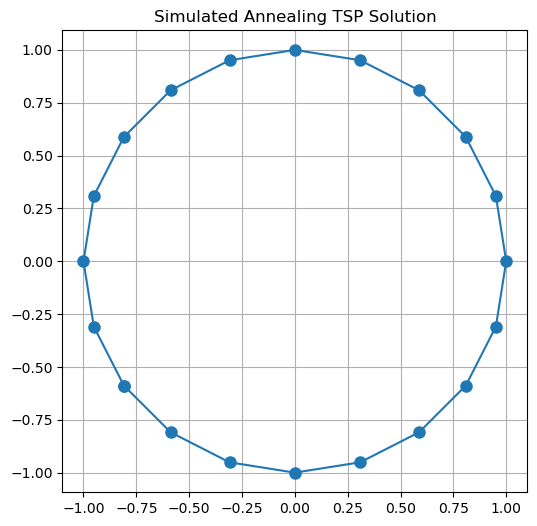

In [ ]:

def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

def total_distance(route, positions):
    distance = 0
    for i in range(len(route)):
        distance += euclidean_distance(positions[route[i]], positions[route[(i + 1) % len(route)]])
    return distance

def generate_circle_stations(n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    return np.stack((np.cos(angles), np.sin(angles)), axis=1)

def swap_two(route):
    i, j = random.sample(range(len(route)), 2)
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

def simulated_annealing(positions, iterations=10000):
    n = len(positions)
    current_route = list(np.random.permutation(n))
    current_cost = total_distance(current_route, positions)
    best_route, best_cost = current_route[:], current_cost

    for k in range(1, iterations + 1):
        temperature = 1 / sqrt(1 + k) 
        proposal = swap_two(current_route)
        proposal_cost = total_distance(proposal, positions)
        delta = proposal_cost - current_cost

        if delta < 0 or np.random.rand() < np.exp(-delta / temperature):
            current_route, current_cost = proposal, proposal_cost
            if current_cost < best_cost:
                best_route, best_cost = current_route[:], current_cost

    return best_route, best_cost

def plot_route(route, positions):
    ordered_positions = positions[route + [route[0]]]  # end where it started
    plt.figure(figsize=(6, 6))
    plt.plot(ordered_positions[:, 0], ordered_positions[:, 1], 'o-', markersize=8)
    plt.title('Simulated Annealing TSP Solution')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# === Run Example ===
n_stations = 20
positions = generate_circle_stations(n_stations)
best_route, best_cost = simulated_annealing(positions, iterations=5000)
print("Best cost found:", best_cost)
plot_route(best_route, positions)


 (b) Then modify your programme to work with costs directly and apply it to the cost matrix from the course homepage.


In [ ]:
# Load cost matrix from CSV
cost_matrix = np.loadtxt(r'C:\Users\rikke\OneDrive - Danmarks Tekniske Universitet\Universitet\Kandidat - MMC\Stochastic Simulation\cost.csv', delimiter=',')

def total_cost(route, cost_matrix):
    cost = 0
    for i in range(len(route)):
        cost += cost_matrix[route[i], route[(i + 1) % len(route)]]
    return cost

def swap_two(route):
    i, j = random.sample(range(len(route)), 2)
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

def simulated_annealing_cost(cost_matrix, iterations=10000):
    n = cost_matrix.shape[0]
    current_route = list(np.random.permutation(n))
    current_cost = total_cost(current_route, cost_matrix)
    best_route, best_cost = current_route[:], current_cost

    for k in range(1, iterations + 1):
        temperature = 1 / np.sqrt(1 + k)
        proposal = swap_two(current_route)
        proposal_cost = total_cost(proposal, cost_matrix)
        delta = proposal_cost - current_cost

        if delta < 0 or np.random.rand() < np.exp(-delta / temperature):
            current_route, current_cost = proposal, proposal_cost
            if current_cost < best_cost:
                best_route, best_cost = current_route[:], current_cost

    return best_route, best_cost

def circular_positions(n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    return np.stack((np.cos(angles), np.sin(angles)), axis=1)

def plot_route(route, positions):
    ordered_positions = positions[route + [route[0]]]
    
    plt.figure(figsize=(6, 6))
    plt.plot(ordered_positions[:, 0], ordered_positions[:, 1], 'o-', markersize=8)

    # Add labels to each station
    for idx, station in enumerate(route):
        x, y = positions[station]
        plt.text(x, y, str(station), fontsize=9, ha='center', va='center', 
                 bbox=dict(facecolor='white', edgecolor='none', pad=1.0))

    plt.title('Simulated Annealing TSP Solution with Station Labels')
    plt.axis('equal')
    plt.grid(True)
    plt.show()



# === Run example ===
best_route, best_cost = simulated_annealing_cost(cost_matrix, iterations=5000)
print("Best cost found:", best_cost)
print("Route:", best_route)

# Generate positions for visualization
positions = circular_positions(len(cost_matrix))
plot_route(best_route, positions)

FileNotFoundError: C:\Users\rikke\OneDrive - Danmarks Tekniske Universitet\Universitet\Kandidat - MMC\Stochastic Simulation\cost.csv not found.

## Exercise 8




1. Exercise 13 in Chapter 8 of Ross (P.152).

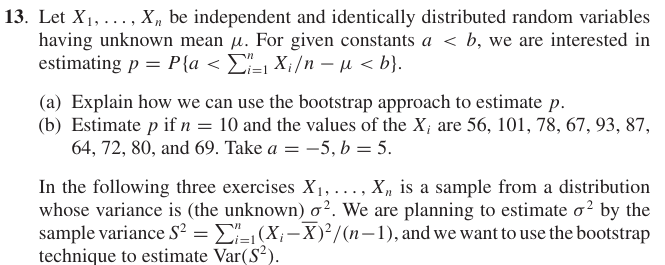


In [493]:
# Given data
x = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
n = len(x)
a, b = -5, 5
r = 10000  # number of bootstrap replicates

# Center the data
x_bar = np.mean(x)
centered = x - x_bar

# Bootstrap resampling
bootstrap_means = []
for _ in range(r):
    resample = np.random.choice(centered, size=n, replace=True)
    bootstrap_means.append(np.mean(resample))

bootstrap_means = np.array(bootstrap_means)

# Estimate p = P(a < mean - mu < b)
p_hat = np.mean((a < bootstrap_means) & (bootstrap_means < b))
print(f"Estimated p: {p_hat:.4f}")


Estimated p: 0.7683


2. Exercise 15 in Chapter 8 of Ross (P.152).

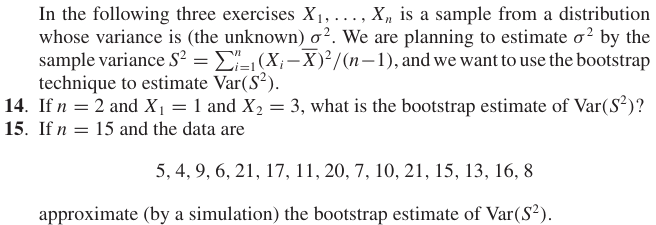

In [494]:
# Given data
data = np.array([5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8])
n = len(data)
r = 10000  # number of bootstrap samples

# Compute original sample variance
original_var = np.var(data, ddof=1)

# Bootstrap resampling
bootstrap_vars = []
for _ in range(r):
    resample = np.random.choice(data, size=n, replace=True)
    var_resample = np.var(resample, ddof=1)
    bootstrap_vars.append(var_resample)

# Estimate Var(S^2)
bootstrap_vars = np.array(bootstrap_vars)
var_of_sample_variance = np.var(bootstrap_vars, ddof=1)

print(f"Original sample variance: {original_var:.4f}")
print(f"Bootstrap estimate of Var(S^2): {var_of_sample_variance:.4f}")


Original sample variance: 34.3143
Bootstrap estimate of Var(S^2): 57.3630


3. Write a subroutine that takes as input a `data` vector of observed values, and which outputs the median as well as the bootstrap estimate of the variance of the median, based on \( r = 100 \) bootstrap replicates. Simulate \( N = 200 \) Pareto distributed random variates with $ \beta = 1 $ and $ k = 1.05 $.

   (a) Compute the mean and the median (of the sample)  
   (b) Make the bootstrap estimate of the variance of the sample mean  
   (c) Make the bootstrap estimate of the variance of the sample median  
   (d) Compare the precision of the estimated median with the precision of the estimated mean. 

In [500]:
def bootstrap_variance(data, stat_func, r=100):
    """Estimate the variance of a statistic using bootstrap."""
    n = len(data)
    stats = []
    for _ in range(r):
        resample = np.random.choice(data, size=n, replace=True)
        stats.append(stat_func(resample))
    return np.var(stats, ddof=1)

def analyse_pareto_sample(n=200, beta=1, k=1.05, r=100):
    # Simulate Pareto-distributed data (note: numpy Pareto = standard Pareto - 1)
    pareto_raw = np.random.pareto(k, size=n)
    data = beta * (pareto_raw + 1)

    # Part (a): compute sample mean and median
    sample_mean = np.mean(data)
    sample_median = np.median(data)

    # Part (b): bootstrap variance of sample mean
    var_mean = bootstrap_variance(data, np.mean, r)

    # Part (c): bootstrap variance of sample median
    var_median = bootstrap_variance(data, np.median, r)

    # Part (d): compare precision (lower variance = higher precision)
    more_precise = "median" if var_median < var_mean else "mean"

    # Display results
    print(f"Sample mean: {sample_mean:.4f}")
    print(f"Sample median: {sample_median:.4f}")
    print(f"Bootstrap variance of mean: {var_mean:.4f}")
    print(f"Bootstrap variance of median: {var_median:.4f}")
    print(f"The {more_precise} is more precise (lower estimated variance).")

    return {
        "mean": sample_mean,
        "median": sample_median,
        "var_mean": var_mean,
        "var_median": var_median,
        "more_precise": more_precise
    }

# Run analysis
results = analyse_pareto_sample()


Sample mean: 4.9705
Sample median: 1.8268
Bootstrap variance of mean: 0.8075
Bootstrap variance of median: 0.0092
The median is more precise (lower estimated variance).
